In [42]:
using DataFrames
using DataFramesMeta
using CSV


In [43]:
df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S1_TEX.dat", DataFrame)
#df = pd.read_csv(r'/Users/royj/development/LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat')
#df = pd.read_csv(r'\\trllimited\data\INF_TRACS\TRACS5\1 - Accreditation\RAV17\5-Accreditation-May23\CC Output\TRACS4\Plates\Texture\RAV17_NS_Run_1_A.dat')
# df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\PTS\MFV1 resubmission\ProfileMats\LONG-PM-NS-R2_rcd_AB1_tex.dat')
#df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\PTS\MFV2 sumbission2\ProfileMats\LONG-PM-NS-R1_AB1_tex.dat')
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest4\\PM_Long\\NS\\T4_20230524_094145_GLUK_RCD_L1AB_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest3\\PM_Long\\NS\\T3_20230524_094200_GLUK_RCD_tex.dat", DataFrame)

Row,Chainage,Texture,Dropout
,Float64,Float64,Int64
1,0.000343596,-33.8,0
2,0.00133793,-32.8,0
3,0.00233227,-32.8,0
4,0.00332661,-32.7,0
5,0.00432095,-32.4,0
6,0.00531529,-32.1,0
7,0.00630962,-32.3,0
8,0.00730396,-32.4,0
9,0.0082983,-31.9,0


In [44]:
minimum_texture = minimum(df.Texture)

adjustment_value = abs(minimum_texture)

#df.adjusted_Tex = df.Texture + adjustment_value
#df.adjusted_Tex = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

readings_per_metre = length(df.Chainage) / maximum(df.Chainage)
println("readings per metre ", readings_per_metre)
hertz = readings_per_metre/2
println("hertz ", hertz)

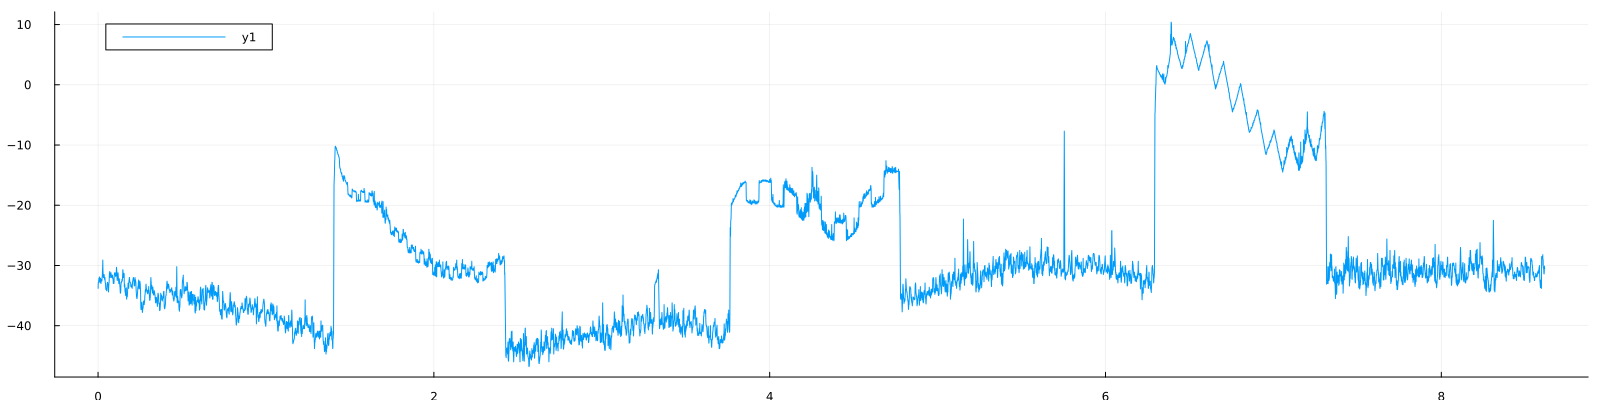

In [45]:
using Plots

#plotattr(size=(1200,400))
plot(df.Chainage
    , df.Texture
    , size=(1600,400))

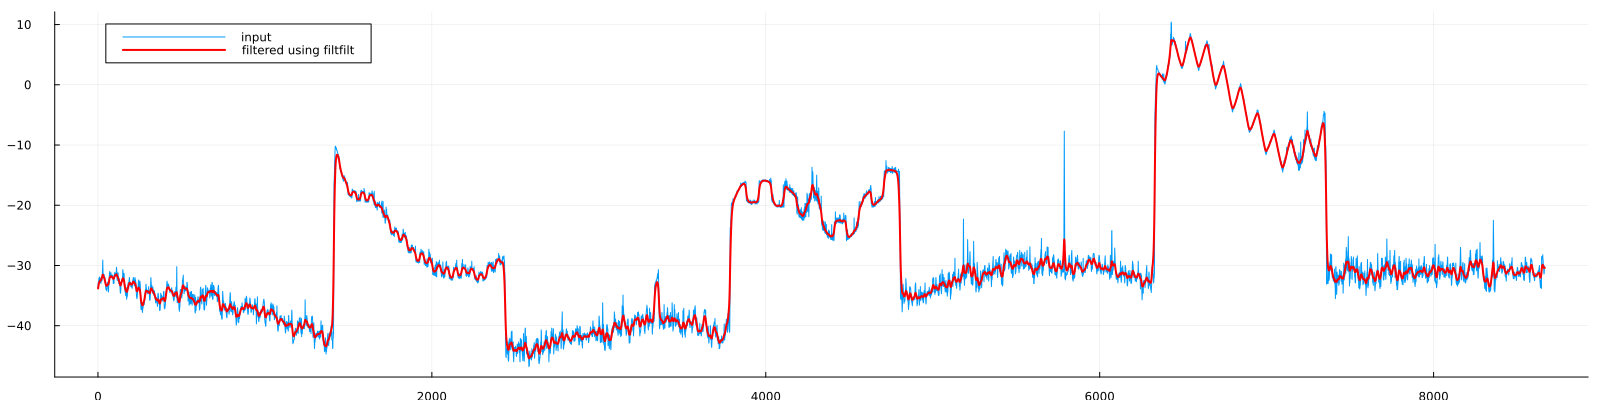

In [46]:
using DSP, Plots
t = 1:1000; fs =2000; f0 = 60  # sampling and cutoff frequencies
rawdata = df.Texture
data_filt = filtfilt(digitalfilter(Lowpass(f0, fs=fs), Butterworth(1)), rawdata)
plot(rawdata,label="input")
plot!(data_filt, lc=:red, lw=2,label="filtered using filtfilt", size=(1600,400))

In [47]:
# using DSP.Filters

# # Design a low-pass filter (adjust parameters as needed)
# fs = 1000  # Sampling frequency (Hz)
# cutoff_freq = 50  # Cutoff frequency for noise removal (Hz)
# filter_order = 10  # Filter order

# b, a = butter(filter_order, cutoff_freq / (fs / 2), "low")

# # Apply the filter to the noisy signal
# filtered_signal = filtfilt(b, a, df.Texture)

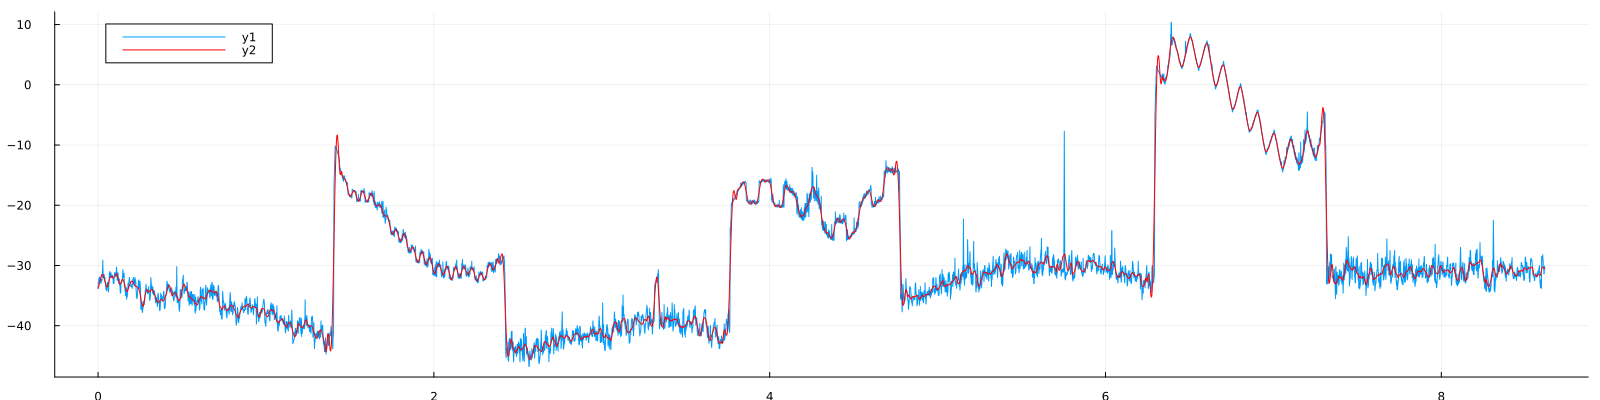

In [48]:
using SavitzkyGolay

# from matplotlib import pyplot as plt
# import matplotlib as mpl
#sg = savitzky_golay(y::AbstractVector, window_size::Int, order::Int; deriv::Int=0, rate::Real=1.0)

sg = savitzky_golay(df.Texture, 99, 6) 

# print(len(df.Chainage))
# plt.subplots(figsize=(20,5))
# plt.plot(df.Chainage, df.Texture)
#plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))
plot(df.Chainage,df.Texture,size=(1600,400))
plot!(df.Chainage, sg.y,lc=:red)

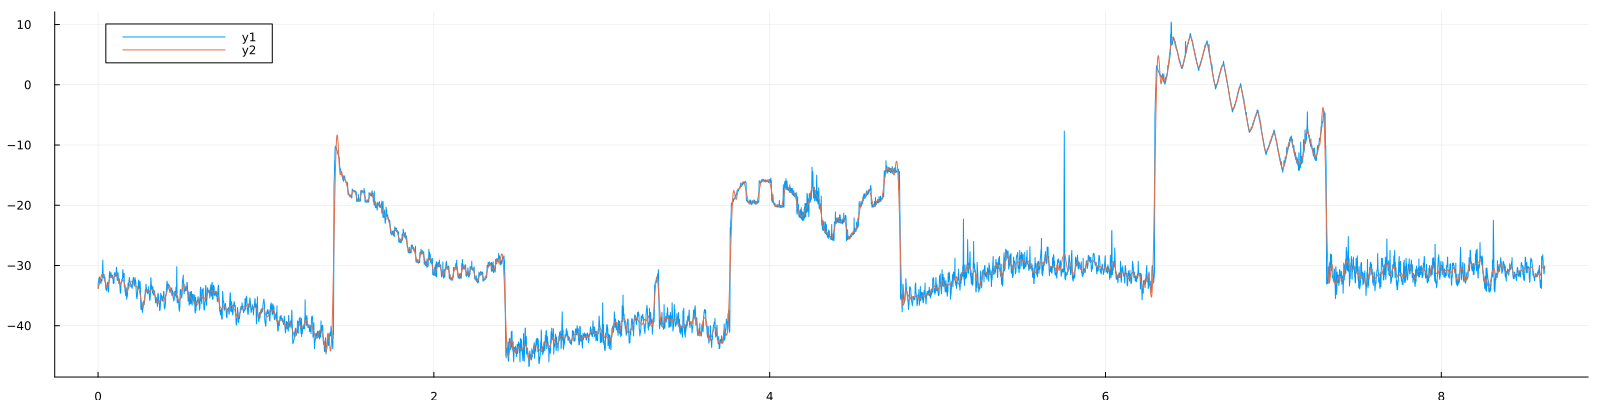

In [49]:
plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))

In [50]:
filtered_tex = sg.y
df.sg = sg.y

8666-element Vector{Float64}:
 -33.80000024452683
 -33.712333014963946
 -33.61470224614249
 -33.51349171556918
 -33.41613424526809
 -33.31612848959967
 -33.215026910084084
 -33.10093306574421
 -32.97999462836266
 -32.86187589236078
   ⋮
 -30.313280424675405
 -30.336391295394616
 -30.367410944606885
 -30.3949543089267
 -30.420577100506353
 -30.441477312564096
 -30.463278027011825
 -30.47640917213119
 -30.5000009691572

In [51]:
# Need to figure out where the input signal increases or decreases by a significant value and is longer than 50 cm.

using ShiftedArrays: lead
df_diff_calc = transform(df, :sg => (x -> x - lead(x,3)) => :data_diff)
transform!(df_diff_calc, :data_diff => (ByRow(x -> abs(x)) => :abs_data_diff))


Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64?
1,0.000343596,-33.8,0,-33.8,-0.286509,0.286509
2,0.00133793,-32.8,0,-33.7123,-0.296199,0.296199
3,0.00233227,-32.8,0,-33.6147,-0.298574,0.298574
4,0.00332661,-32.7,0,-33.5135,-0.298465,0.298465
5,0.00432095,-32.4,0,-33.4161,-0.315201,0.315201
6,0.00531529,-32.1,0,-33.3161,-0.336134,0.336134
7,0.00630962,-32.3,0,-33.215,-0.353151,0.353151
8,0.00730396,-32.4,0,-33.1009,-0.372125,0.372125
9,0.0082983,-31.9,0,-32.98,-0.394452,0.394452


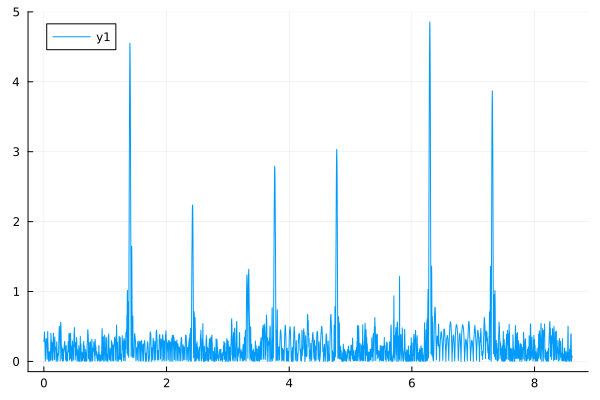

In [52]:
plot(df_diff_calc.Chainage, df_diff_calc.abs_data_diff)


In [53]:
# return the rows where the difference is greater than a given value

potential_plates = subset(df_diff_calc, :abs_data_diff => ByRow(abs_data_diff -> abs_data_diff > 2), skipmissing=true)
#
#textureΔ =
#mapcols(data_diff -> df_diff_calc)

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64?
1,1.39043,-40.5,0,-42.6174,-2.06273,2.06273
2,1.39142,-41.7,0,-42.0213,-2.35472,2.35472
3,1.39242,-42.3,0,-41.3433,-2.65431,2.65431
4,1.39341,-42.3,0,-40.5547,-2.93787,2.93787
5,1.39441,-42.4,0,-39.6666,-3.19245,3.19245
6,1.3954,-42.4,0,-38.689,-3.41923,3.41923
7,1.39639,-43.0,0,-37.6168,-3.61832,3.61832
8,1.39739,-43.8,0,-36.4741,-3.79508,3.79508
9,1.39838,-43.7,0,-35.2698,-3.96093,3.96093


In [56]:
print("fred")

In [27]:
#length_of_df = length(potential_plates[!,1])
length_of_df = length(df_diff_calc[!,1])
println(length_of_df)
df_diff_calc.data_diff[ismissing.(df_diff_calc.data_diff)] .= 0

# global df_diff_calc
i=1
# global plate_start =1
# global plate_end= 2
# global plate_position = 1

while i <= length_of_df

    println(i)
    #plate_position = i
    #plate_start=1
    #plate_end=1
    abs_data_diff = df_diff_calc[i,:abs_data_diff]
    #int_data_diff: Float64 = df_diff_calc[i,:data_diff]
    int_data_diff = df_diff_calc[i,:data_diff]
    #println(plate_position) # , "DATA DIFF ",int_data_diff)

    if ismissing(int_data_diff) int_data_diff = 0 end

    print(int_data_diff)

    if int_data_diff <= -2.0
        plate_start = i
        println("row ", i, " data_diff ",int_data_diff)
        i = i + 800
    # else
    #     i+=1
        #continue
    end

    # if int_data_diff >= 2
    #     plate_end = i
    #     i =i +1000
    #     println( "start ", plate_start)
    #     println("End ", plate_end)
    # end
    global i +=1
    
end


In [2]:
while i <= 3
    println(i)
    global i += 1
end
println(i)

4


In [1]:
i=1

while i <= 3
    println(i)
    global i += 1
end
println(i)

1
2
3
4


In [220]:
length_of_df

8666

In [216]:
df_diff_calc

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64?
1,0.000343596,-33.8,0,-33.8,-0.286509,0.286509
2,0.00133793,-32.8,0,-33.7123,-0.296199,0.296199
3,0.00233227,-32.8,0,-33.6147,-0.298574,0.298574
4,0.00332661,-32.7,0,-33.5135,-0.298465,0.298465
5,0.00432095,-32.4,0,-33.4161,-0.315201,0.315201
6,0.00531529,-32.1,0,-33.3161,-0.336134,0.336134
7,0.00630962,-32.3,0,-33.215,-0.353151,0.353151
8,0.00730396,-32.4,0,-33.1009,-0.372125,0.372125
9,0.0082983,-31.9,0,-32.98,-0.394452,0.394452
